In [1]:
#Three-Qubit Gates
#Amitava Chakraborty - 15th Jan 2018
from qiskit import IBMQ
# Loading your IBM Q account(s)
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
# Useful additional packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

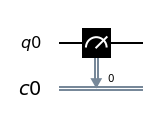

In [7]:
#Non unitary operations
#Now we have gone through all the unitary operations in quantum circuits 
#we also have access to non-unitary operations. 
#These include measurements, reset of qubits, and classical conditional operations.
q = QuantumRegister(1)
c = ClassicalRegister(1)

#Measurements
#We don’t have access to all the information when we make a measurement in a quantum computer. 
#The quantum state is projected onto the standard basis. 
#Below are two examples showing a circuit that is prepared in a basis state and 
#the quantum computer prepared in a superposition state.
qc = QuantumCircuit(q, c)
qc.measure(q, c)
qc.draw(output='mpl')

In [8]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
job.result().get_counts(qc)
#The simulator predicts that 100 percent of the time the classical register returns 0.

{'0': 1024}

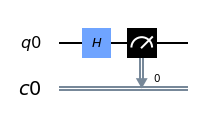

In [9]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q, c)
qc.draw(output='mpl')

In [10]:
job = execute(qc, backend, shots=1024)
job.result().get_counts(qc)
#The simulator predicts that 50 percent of the time the classical register returns 0 or 1.

{'1': 508, '0': 516}

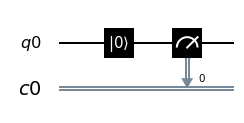

In [11]:
#Reset
#It is also possible to reset qubits to the |0> state in the middle of computation. 
#Note that reset is not a Gate operation, since it is irreversible.
qc = QuantumCircuit(q, c)
qc.reset(q[0])
qc.measure(q, c)
qc.draw(output='mpl')

In [12]:
job = execute(qc, backend, shots=1024)
job.result().get_counts(qc)

{'0': 1024}

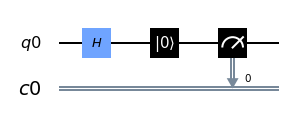

In [13]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.reset(q[0])
qc.measure(q, c)
qc.draw(output='mpl')

In [14]:
job = execute(qc, backend, shots=1024)
job.result().get_counts(qc)
#Here we see that for both of these circuits 
#the simulator always predicts that the output is 100 percent in the 0 state.

{'0': 1024}

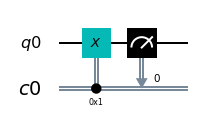

In [17]:
#Conditional operations
#It is also possible to do operations conditioned on the state of the classical register
qc = QuantumCircuit(q, c)
qc.x(q[0]).c_if(c, 1)
qc.measure(q,c)
qc.draw(output='mpl')
#Here the classical bit always takes the value 0 so the qubit state is always flipped.

In [18]:
job = execute(qc, backend, shots=1024)
job.result().get_counts(qc)

{'0': 1024}

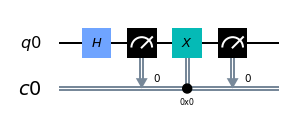

In [19]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q,c)
qc.x(q[0]).c_if(c, 0)
qc.measure(q,c)
qc.draw(output='mpl')

In [20]:
job = execute(qc, backend, shots=1024)
job.result().get_counts(qc)
#the classical bit by the first measurement is random but 
#the conditional operation results in the qubit being deterministically put into

{'1': 1024}

In [21]:
#Arbitrary initialization
#Now we want to initialize a qubit register to an arbitrary state
#An arbitrary state for n qubits may be specified by a vector of 2^n amplitudes, 
#where the sum of amplitude-norms-squared equals 1. 
#For example, the following three-qubit state can be prepared:
# Initializing a three-qubit quantum state
import math
desired_vector = [
    1 / math.sqrt(16) * complex(0, 1),
    1 / math.sqrt(8) * complex(1, 0),
    1 / math.sqrt(16) * complex(1, 1),
    0,
    0,
    1 / math.sqrt(8) * complex(1, 2),
    1 / math.sqrt(16) * complex(1, 0),
    0]

q = QuantumRegister(3)
qc = QuantumCircuit(q)

qc.initialize(desired_vector, [q[0],q[1],q[2]])

In [22]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
qc_state = job.result().get_statevector(qc)
qc_state

array([2.50000000e-01+0.j        , 2.77555756e-17-0.35355339j,
       2.50000000e-01-0.25j      , 0.00000000e+00+0.j        ,
       0.00000000e+00+0.j        , 7.07106781e-01-0.35355339j,
       4.16333634e-17-0.25j      , 0.00000000e+00+0.j        ])

In [13]:
#Fidelity is useful to check whether two states are same or not. 
#The fidelity is equal to 1 if and only if two states are same.
state_fidelity(desired_vector,qc_state)

1.0